<a href="https://colab.research.google.com/github/DarksterTwilight/Auto-Encoder/blob/main/Auto_Encoder_Assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing dependecies

In [1]:
!pip install tensorflow matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install tensorflow-datasets ipwedgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement ipwedgets (from versions: none)
ERROR: No matching distribution found for ipwedgets


In [3]:
#Bringing in tensorflow dataset for mnist
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [5]:
ds, ds_info = tfds.load('mnist',split='train', with_info = True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


## Visualizing and Building dataset

In [6]:
import numpy as np
# Set up connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [7]:
# Getting data out of pipeline
print(dataiterator.next()['image'].shape)
# Reshapping 
print(np.squeeze(dataiterator.next()['image']).shape)

(28, 28, 1)
(28, 28)


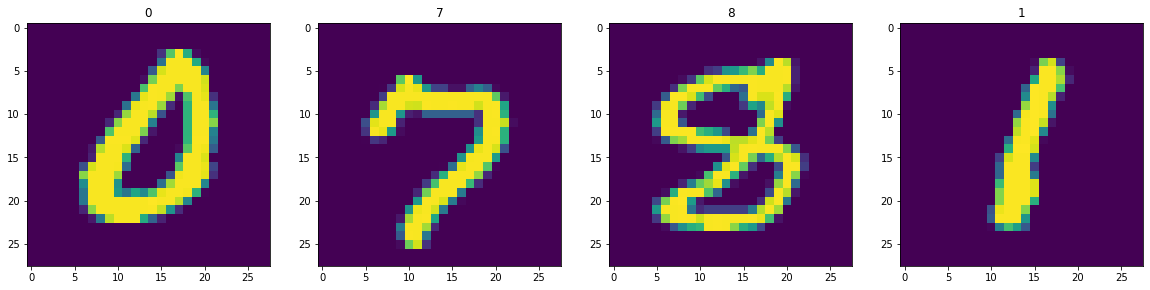

In [8]:
#Set up subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch = dataiterator.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [9]:
# Sacale and return image only
def scale_image(data):
  image = data['image']
  return image/255

In [10]:
# map
# cache
# shuffle
# batch
# prefetch

ds = tfds.load('fashion_mnist', split='train')
ds = ds.map(scale_image)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ7MM3W/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteQ7MM3W/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [11]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building Neural Network

### Importing Modelling Components

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, ReLU, LeakyReLU

### Building Auto-Encoder